## Data Pre Processing 

In [75]:
import pandas as pd

df = pd.read_csv("churn.csv")
print(df.shape)

df.drop(columns=["RowNumber", "CustomerId" , "Surname" ],inplace=True)
print(df.isnull().sum())
X = df.drop(columns=["Exited"])
Y = df[["Exited"]]

(10000, 14)
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Graphs

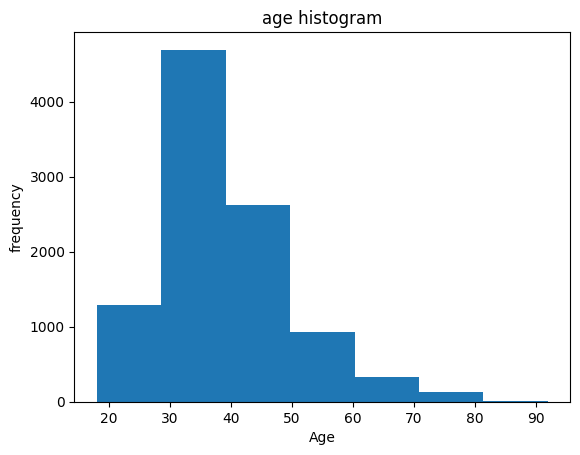

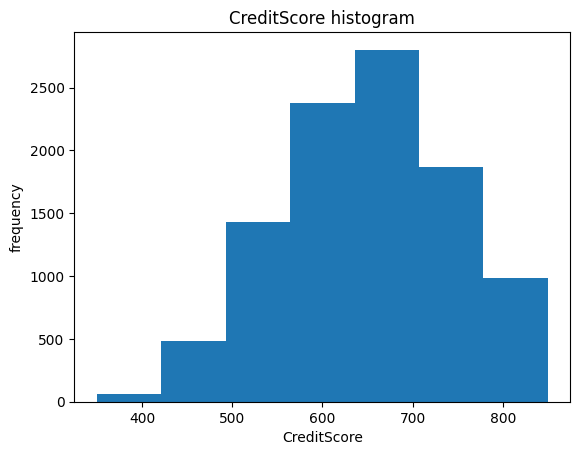

In [76]:
import matplotlib 
from matplotlib import pyplot as plt

plt.hist(bins=7,x=X["Age"])
plt.title("age histogram")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()

plt.hist(bins=7,x=X["CreditScore"])
plt.title("CreditScore histogram")
plt.xlabel("CreditScore")
plt.ylabel("frequency")
plt.show()

In [77]:
print("mean of Age is ",X['Age'].mean())
print("mean of CreditScore is ",X['CreditScore'].mean())


print("std of Age is ",X['Age'].std())
print("std of CreditScore is ",X['CreditScore'].std())

mean of Age is  38.9218
mean of CreditScore is  650.5288
std of Age is  10.487806451704609
std of CreditScore is  96.65329873613035


,Gender,Geography,IsActiveMember,Total
0,Female,France,0,1099
1,Female,France,1,1162
2,Female,Germany,0,634
3,Female,Germany,1,559
4,Female,Spain,0,526
5,Female,Spain,1,563
6,Male,France,0,1324
7,Male,France,1,1429
8,Male,Germany,0,627
9,Male,Germany,1,689


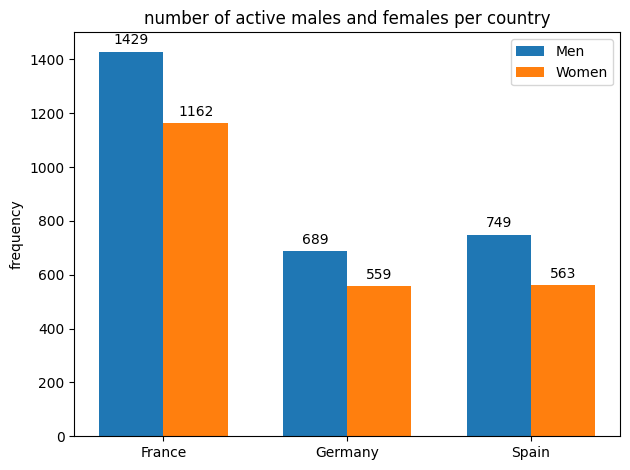

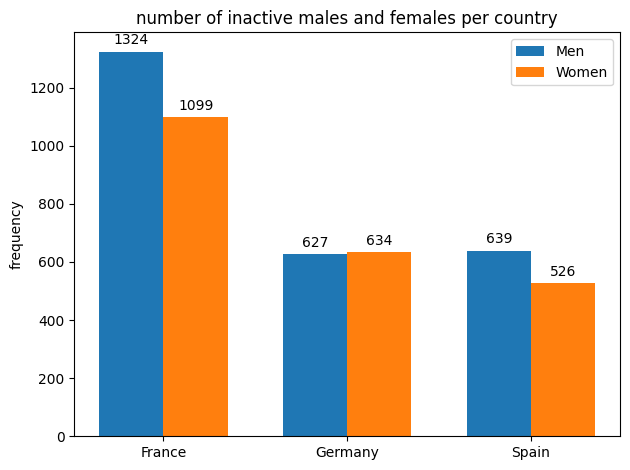

In [78]:
import numpy as np

temp = df.groupby(['Gender','Geography','IsActiveMember'])['Age'].count().reset_index()
temp.rename(columns={'Age':'Total'},inplace =True)
display(temp)
male_data = temp[(temp.Gender=='Male')]
female_data = temp[(temp.Gender=='Female')]

labels = male_data[male_data.IsActiveMember==1]['Geography']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, male_data[male_data.IsActiveMember==1]['Total'], width, label='Men')
rects2 = ax.bar(x+width/2,female_data[female_data.IsActiveMember==1]['Total'], width, label='Women')
ax.set_ylabel('frequency')
ax.set_title('number of active males and females per country')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()


labels = male_data[male_data.IsActiveMember==1]['Geography']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, male_data[male_data.IsActiveMember==0]['Total'], width, label='Men')
rects2 = ax.bar(x+width/2,female_data[female_data.IsActiveMember==0]['Total'], width, label='Women')
ax.set_ylabel('frequency')
ax.set_title('number of inactive males and females per country')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()


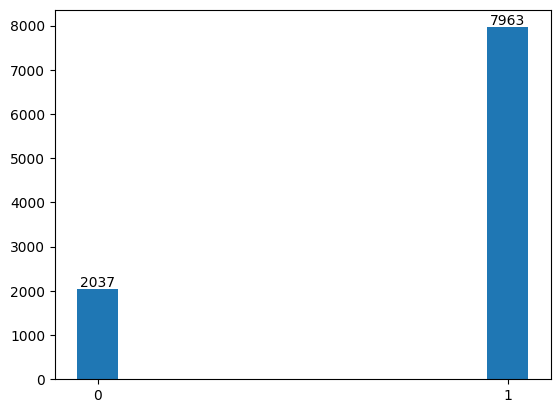

In [79]:
fig, ax = plt.subplots()
bars = ax.bar(Y.groupby(['Exited']).count().index.values,[Y[Y.Exited==1].count().values[0],Y[Y.Exited==0].count().values[0]],width = 0.1)
ax.bar_label(bars)
ax.set_xticks([0,1])
plt.show()

## Model Training

In [80]:
print(X.shape)
X=pd.get_dummies(X,columns=['Gender','Geography'],drop_first=True)
print(X.shape)


(10000, 10)
(10000, 11)


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8000, 11) (2000, 11) (8000, 1) (2000, 1)


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
model_1_lr = LogisticRegression(random_state=0).fit(X_train,y_train.values.ravel())
y_pred_lr=model_1_lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracyScore_lr = accuracy_score(y_test,y_pred_lr)
print(accuracyScore_lr)


0.8125


### SVM

In [84]:
from sklearn.svm import SVC
model_2_svm= SVC(random_state=0).fit(X_train, y_train.values.ravel())
y_pred_svm = model_2_svm.predict(X_test)
accuracyScore_svm = accuracy_score(y_test,y_pred_svm)
print(accuracyScore_svm)

0.856


### SMOTE

In [85]:
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)
print(X_train_smote.shape,y_train_smote.shape)

(12736, 11) (12736, 1)


#### Smote LR 

In [86]:
from sklearn.linear_model import LogisticRegression
model_3_smote_lr = LogisticRegression(random_state=0).fit(X_train_smote,y_train_smote.values.ravel())
y_pred_smote_lr=model_3_smote_lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracyScore_smote_lr = accuracy_score(y_test,y_pred_smote_lr)
print(accuracyScore_smote_lr)

0.7065


#### Smote SVM

In [87]:
from sklearn.svm import SVC
model_4_smote_svm= SVC(random_state=0).fit(X_train_smote,y_train_smote.values.ravel())
y_pred_smote_svm = model_4_smote_svm.predict(X_test)
accuracyScore_smote_svm = accuracy_score(y_test,y_pred_smote_svm)
print(accuracyScore_smote_svm)

0.7645


### Grid Search 

In [88]:
param_grid = {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}
from sklearn.model_selection import GridSearchCV

gSCV=GridSearchCV(estimator = SVC(), param_grid = param_grid, cv=5, verbose =1, scoring = 'accuracy')
model_gSCV=gSCV.fit(X_train,y_train.values.ravel())
print(model_gSCV.best_params_)
print(model_gSCV.best_score_)
model_gSCV_score = model_gSCV.score(X_test,y_test)
y_pred_gSCV= model_gSCV.predict(X_test)
accuracyScore_gSCV = accuracy_score(y_test,y_pred_gSCV)
print("accuracy",accuracyScore_gSCV)
print("score",model_gSCV_score)
print("best params",model_gSCV.best_params_)
print("best f1 score",model_gSCV.best_score_)




Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 1000, 'gamma': 0.1}
0.854125
accuracy 0.8645
score 0.8645
best params {'C': 1000, 'gamma': 0.1}
best f1 score 0.854125


## Classification Reports

### Logistic regression

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_1_lr_classification_report = classification_report(y_test, y_pred_lr,output_dict=True)
print("report for model_1_lr class 0 :",model_1_lr_classification_report["0"])
print("report for model_1_lr class 1 :",model_1_lr_classification_report["1"])
print("confusion matrix for model_1_lr is ",confusion_matrix(y_test, y_pred_lr))


report for model_1_lr class 0 : {'precision': 0.8308026030368764, 'recall': 0.9605015673981191, 'f1-score': 0.8909566734515847, 'support': 1595}
report for model_1_lr class 1 : {'precision': 0.5961538461538461, 'recall': 0.22962962962962963, 'f1-score': 0.3315508021390374, 'support': 405}
confusion matrix for model_1_lr is  [[1532   63]
 [ 312   93]]


### SVM

In [90]:
model_2_svm_classification_report = classification_report(y_test, y_pred_svm,output_dict=True)
print("report for model_2_svm class 0 :",model_2_svm_classification_report["0"])
print("report for model_2_svm class 1 :",model_2_svm_classification_report["1"])
print("confusion matrix for model_2_svm  is ",confusion_matrix(y_test, y_pred_svm))

report for model_2_svm class 0 : {'precision': 0.8534342888047594, 'recall': 0.9893416927899686, 'f1-score': 0.9163763066202091, 'support': 1595}
report for model_2_svm class 1 : {'precision': 0.8874172185430463, 'recall': 0.3308641975308642, 'f1-score': 0.48201438848920863, 'support': 405}
confusion matrix for model_2_svm  is  [[1578   17]
 [ 271  134]]


### SMOTE LR

In [91]:
model_3_smote_lr_classification_report = classification_report(y_test, y_pred_smote_lr,output_dict=True)
print("report for model_3_smote_lr class 0 :",model_3_smote_lr_classification_report["0"])
print("report for model_3_smote_lr class 1 :",model_3_smote_lr_classification_report["1"])
print("confusion matrix for model_3_smote_lr is ",confusion_matrix(y_test, y_pred_smote_lr))

report for model_3_smote_lr class 0 : {'precision': 0.9057971014492754, 'recall': 0.7053291536050157, 'f1-score': 0.7930912936200212, 'support': 1595}
report for model_3_smote_lr class 1 : {'precision': 0.37994722955145116, 'recall': 0.7111111111111111, 'f1-score': 0.4952708512467756, 'support': 405}
confusion matrix for model_3_smote_lr is  [[1125  470]
 [ 117  288]]


### SMOTE SVM 

In [92]:
model_4_smote_svm_classification_report = classification_report(y_test, y_pred_smote_svm,output_dict=True)
print("report for model_4_smote_svm class 0 :",model_4_smote_svm_classification_report["0"])
print("report for model_4_smote_svm class 1 :",model_4_smote_svm_classification_report["1"])
print("confusion matrix for model_4_smote_svm is ",confusion_matrix(y_test, y_pred_smote_svm))

report for model_4_smote_svm class 0 : {'precision': 0.9257575757575758, 'recall': 0.7661442006269592, 'f1-score': 0.8384219554030875, 'support': 1595}
report for model_4_smote_svm class 1 : {'precision': 0.4514705882352941, 'recall': 0.7580246913580246, 'f1-score': 0.5658986175115208, 'support': 405}
confusion matrix for model_4_smote_svm is  [[1222  373]
 [  98  307]]


### GRID

In [93]:
model_gSCV_classification_report = classification_report(y_test, y_pred_gSCV,output_dict=True)
print("report for gSCV class 0 :",model_gSCV_classification_report["0"])
print("report for gSCV class 1 :",model_gSCV_classification_report["1"])

report for gSCV class 0 : {'precision': 0.8744343891402715, 'recall': 0.9692789968652038, 'f1-score': 0.9194171870353851, 'support': 1595}
report for gSCV class 1 : {'precision': 0.7887931034482759, 'recall': 0.45185185185185184, 'f1-score': 0.5745682888540031, 'support': 405}


### False Positive and negative for LR 

In [112]:
from sklearn.metrics import confusion_matrix

confusion_matrix1=confusion_matrix(y_test, y_pred_lr)
FN = confusion_matrix1.sum(axis=1) - np.diag(confusion_matrix1)
print("False positive,False Negative ",FN)

False positive,False Negative  [ 63 312]
